# Exploring Hacker News – Insights from a Popular Tech Community

## 1. Introduction

In this project, we'll work with a dataset of submissions to the popular technology site [Hacker News](https://news.ycombinator.com/).

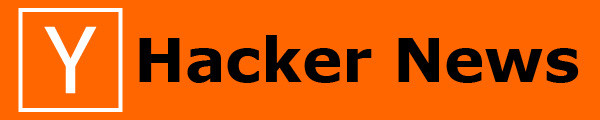

Hacker News is a site initiated by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories, known as **posts**, receive votes and comments, akin to [Reddit]((https://www.reddit.com/)). Hacker News holds immense popularity within technology and startup communities, with top-ranking posts attracting hundreds of thousands of visitors.

The full dataset can be found [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts). However, [Dataquest](https://www.dataquest.io/) has condensed it from nearly `300,000` entries to approximately `20,000` rows by excluding submissions without any comments, then subsequently sampling randomly from the remaining entries. Below are descriptions of the dataset columns:

- `id` – the unique identifier for the post on Hacker News.
- `title` – the title of the post.
- `url` – the URL linked in the post (if applicable).
- `num_points` – the total points the post acquired (upvotes minus downvotes).
- `num_comments` – the number of comments on the post.
- `author` – the username of the post submitter.
- `created_at` – the submission date and time.

## 2. Opening and Exploring the Data

We're specifically interested in posts with titles that begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question. Similarly, users submit `Show HN` posts to showcase a project, product, or something interesting. We'll compare these two types of posts to determine the following:

* Do `Ask HN` or `Show HN` receive more comments on average?
* Do posts created at a certain time receive more comments on average?

Let's start by importing the libraries we need, and reading the dataset into a list of lists.

In [1]:
# Import the relevant libraries
from csv import reader
import datetime as dt

# Open the file 'hacker_news.csv', then create a CSV reader object
opened_file = open('Datasets/hacker_news.csv')
read_file = reader(opened_file)

# Convert the CSV reader object into a list
hn = list(read_file)

# Store the headers and the remaining data separately
headers = hn[0]
hn = hn[1:]

# Print the headers and the first three rows of data
print(headers, end='\n\n')

for row in hn[:3]:
    print(row, end='\n\n')

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']



Each inner list in `hn` represents a post on Hacker News, and contains information such as the post `id`, `title`, and `url`. From this data, it's evident that there's a variety of post topics and engagement levels within the Hacker News community.

## 3. Extracting Ask HN and Show HN Posts

Now that we've separated the headers from `hn`, we're ready to filter our data. Since we're only concerned with post titles beginning with `Ask HN` or `Show HN`, we'll create new lists of lists containing just the data for those titles.

In [2]:
# Initialize lists to store different types of posts
ask_posts = []
show_posts = []
other_posts = []

# Iterate through each row in the dataset
for row in hn:
    # Extract the title from the row
    title = row[1]
    # If the title starts with "ask hn" (case insensitive), add the row to the `ask_posts` list
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    # If the title starts with "show hn" (case insensitive), add the row to the `show_posts` list
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    # If the title neither starts with "ask hn" nor "show hn", add the row to the `other_posts` list
    else:
        other_posts.append(row)

# Print the number of "ask hn" posts, "show hn" posts, and other posts
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

1744
1162
17194


In [3]:
# Print the first two rows from the `ask_posts` list
for row in ask_posts[:2]:
    print(row, end='\n\n')

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']

['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']



In [4]:
# Print the first two rows from the `show_posts` list
for row in show_posts[:2]:
    print(row, end='\n\n')

['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']

['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']



## 4. Calculating the Average Number of Comments for Ask HN and Show HN Posts

Now that we have separated the **ask posts** and **show posts** into two lists of lists named `ask_posts` and `show_posts`, respectively, let's determine if ask posts or show posts receive more comments on average.

In [5]:
# Store the total number of comments on "ask" posts
total_ask_comments = 0

# Iterate through each row in the `ask_posts` list
for row in ask_posts:
    # Extract the number of comments from each row, and add it to the total
    num_comments = row[4]
    total_ask_comments += int(num_comments)

# Calculate and round the average number of comments per "ask" post
avg_ask_comments = round(total_ask_comments / len(ask_posts))
avg_ask_comments

14

In [6]:
# Store the total number of comments on "show" posts
total_show_comments = 0

# Iterate through each row in the `show_posts` list
for row in show_posts:
    # Add the number of comments from each row to the total
    total_show_comments += int(row[4])
    
# Calculate and round the average number of comments per "show" post
avg_show_comments = total_show_comments // len(show_posts)
avg_show_comments

10

On average, ask posts in our sample receive approximately `14` comments, whereas show posts receive approximately `10`. Since ask posts are more likely to receive comments, we'll focus our remaining analysis solely on these posts.

## 5. Finding the Number of Ask Posts and Comments Created by Hour

Next, we'll determine if ask posts created at a certain time are more likely to attract comments. We'll use the following steps to perform this analysis:
- Calculate the number of ask posts created in each hour of the day, along with the number of comments received.
- Calculate the average number of comments ask posts receive by hour created.

Fow now, we'll work on the first step – calculating the number of ask posts and comments created by hour.

In [7]:
# Store counts and comments by hour
counts_by_hour = {}
comments_by_hour = {}

# Iterate through each row in `ask_posts`
for row in ask_posts:
    # Extract the 'created_at' and 'num_comments' data
    created_at = row[6]
    num_comments = int(row[4])
    
    # Convert the `created_at` string to a datetime object
    date = dt.datetime.strptime(created_at, '%m/%d/%Y %H:%M')
    
    # Extract the hour from the datetime object
    hour = dt.datetime.strftime(date, "%H")
    
    # Update the counts and comments dictionaries based on the hour
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_comments

## 6. Calculating the Average Number of Comments for Ask HN Posts by Hour

In the previous step, we created two dictionaries:
- `counts_by_hour` – contains the number of ask posts created during each hour of the day.
- `comments_by_hour` – contains the corresponding number of comments received by ask posts created during each hour.

We'll use these two dictionaries to calculate the average number of comments for posts created during each hour of the day.

In [8]:
# Store average comments per hour
avg_by_hour = []

# Iterate through each hour in the `counts_by_hour` dictionary
for hour in counts_by_hour:
    # Append the average comments per post for the hour to the list
    avg_by_hour.append([hour, round((comments_by_hour[hour] / counts_by_hour[hour]), 2)])

# Print the average comments per hour
print(avg_by_hour)

[['09', 5.58], ['13', 14.74], ['10', 13.44], ['14', 13.23], ['16', 16.8], ['23', 7.99], ['12', 9.41], ['17', 11.46], ['15', 38.59], ['21', 16.01], ['20', 21.52], ['02', 23.81], ['18', 13.2], ['03', 7.8], ['05', 10.09], ['19', 10.8], ['01', 11.38], ['22', 6.75], ['08', 10.25], ['04', 7.17], ['00', 8.13], ['06', 9.02], ['07', 7.85], ['11', 11.05]]


Although we now have the results we need, this format makes it difficult to identify the hours with the highest values.

## 7. Sorting and Printing Values from a List of Lists

Let's finish by sorting the `avg_by_hour` list of lists, and printing the top `5` highest values in a format that's easier to read.

In [9]:
# Initialize variables for swapping the hour and average comments, and for tracking ranking
swap_avg_by_hour = []
ranking = 1

# Swap the hour and average comments in each row, then append to the `swap_avg_by_hour` list
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

# Sort the list in descending order based on average comments
sorted_swap = sorted(swap_avg_by_hour, reverse=True)


# Print header for the top 5 hours
print("Top 5 Hours for Ask Posts Comments", end='\n\n')

# Iterate through the top 5 hours
for row in sorted_swap[:5]:
    
    # Format hour to display as 'HH:MM', and extract the average comments
    hour = dt.datetime.strptime(row[1], '%H').strftime('%H:%M')
    average = row[0]
    
    # Print the ranking, hour, average comments per post, then increment ranking for next iteration
    print("{}. {}: {:.2f} average comments per post".format(ranking, hour, average))
    ranking += 1

Top 5 Hours for Ask Posts Comments

1. 15:00: 38.59 average comments per post
2. 02:00: 23.81 average comments per post
3. 20:00: 21.52 average comments per post
4. 16:00: 16.80 average comments per post
5. 21:00: 16.01 average comments per post


The hour that receives the most comments per post on average is `15:00`, with an average of `38.59` comments per post. There's about a `60%` increase in the number of comments between the hour with the highest and the second-highest average number of comments.

According to the dataset [documentation](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts), the timezone used is `Eastern Time` in the US. So, we could also write `15:00` as `3:00 pm EST`.

## 8. Conclusion

In this project, we worked with a reduced dataset of submissions to the Hacker News website. We were specifically interested in posts with titles that begin with either `Ask HN` or `Show HN`. We also compared these two types of posts to answer two questions related to our project.

On average, we found that ask posts are more likely to receive comments, so we focused our remaining analysis solely on these posts. Additionally, we calculated the number of ask posts created during each hour of the day, along with the corresponding number of comments received. Furthermore, we computed the average number of comments received by ask posts, categorized by the hour they were created.

Based on our analysis, to maximize the amount of comments a post receives, we'd recommend the post be categorized as an **ask post**, and created between `15:00` and `16:00` (`3:00 pm EST` – `4:00 pm EST`). However, it should be noted that the dataset we analyzed excluded posts without comments. Given that, it's more accurate to say that among **only** the posts that received comments, ask posts received more comments on average. Additionally, ask posts created between `15:00` and `16:00` (`3:00 pm EST` – `4:00 pm EST`) received the most comments on average.